In [ ]:
'''
Are any States/Territories seeing a reduction in infection cases?
How do we define flattening the curve? Logistic curve

'''

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter

In [4]:
url = 'https://raw.githubusercontent.com/AndrewDataScience/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
url2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
df_usconf = pd.read_csv(url,error_bad_lines = False)
df_usdead = pd.read_csv(url2,error_bad_lines = False)
pd.options.display.max_columns = None

In [5]:
columns_to_remove = ['UID', 'code3', 'FIPS', 'Lat', 'Long_']
df_usconf = df_usconf[Counter(df_usconf.columns.tolist()) - Counter(columns_to_remove)]
df_usdead = df_usdead[Counter(df_usdead.columns.tolist()) - Counter(columns_to_remove)]

US_confirmed_daily_increase = df_usconf.copy()
US_dead_daily_increase = df_usdead.copy()

US_confirmed_daily_increase.iloc[:,6:] = US_confirmed_daily_increase.iloc[:,6:].diff(axis=1).fillna(0).astype('int')
US_dead_daily_increase.iloc[:,7:] = US_dead_daily_increase.iloc[:,7:].diff(axis=1).fillna(0).astype('int')

In [143]:
BA_counties = ['Alameda','Contra Costa','Marin','Napa','San Francisco','San Mateo','Santa Clara','Solano','Sonoma']
LA_counties =['Ventura','San Bernadio', 'Riverside', 'Los Angeles', 'Orange']

CA_daily_increase = US_confirmed_daily_increase[(US_confirmed_daily_increase['Province_State']=='California')]
BA_daily_increase = US_confirmed_daily_increase[(US_confirmed_daily_increase['Province_State']=='California') & (US_confirmed_daily_increase['Admin2'].isin(BA_counties))]
LA_daily_increase = US_confirmed_daily_increase[(US_confirmed_daily_increase['Province_State']=='California') & (US_confirmed_daily_increase['Admin2'].isin(LA_counties))]

CA_transpose = CA_daily_increase.copy().transpose().rename(columns = pd.Series(CA_daily_increase['Admin2']))[6:]
BA_transpose = BA_daily_increase.copy().transpose().rename(columns = pd.Series(BA_daily_increase['Admin2']))[6:]
LA_transpose = LA_daily_increase.copy().transpose().rename(columns = pd.Series(LA_daily_increase['Admin2']))[6:]

US_transpose = US_confirmed_daily_increase.copy().transpose().rename(columns = lambda c: transpose.iloc[5,c])[6:]

In [144]:
CA_transpose.to_csv('X:/Users/AC/Downloads/CA_daily_increments.csv')

In [129]:
CA_daily_increase

,iso2,iso3,Admin2,Province_State,Country_Region,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20
191,US,USA,Alameda,California,US,"Alameda, California, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,2,0,2,4,0,7,9,3,8,10,20,3,47,17,0,43,42,0,50,13,30,0,46,84,0,123,22,46,40,0,92,40,39,43,0,76,43,56,51,50,29,48,1,110,51,36,31,30,33,35,35,33,70,43,27,33,54,54,44,62,41,37,32,45,56,133,-16,41,65,65,38,49,99,52,87,27,112,63,48,98,94,101,80,45,33,93,84,80,0,140,40,48,199,-16,1,103,53,108,52,105,64,222,0,83
192,US,USA,Alpine,California,US,"Alpine, California, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
193,US,USA,Amador,California,US,"Amador, California, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,-3,3,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,9,-9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,9
194,US,USA,Butte,California,US,"Butte, California, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,1,0,0,0,0,3,0,1,1,1,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,2,0,0,2,0,0,0,2,2,4,1,3,0,0,0,6,0,0,4,0,0,7,0,4,5,5,0,0,3,3,2,0,1,0,0,8,6,2,0,4,0,0,17
195,US,USA,Calaveras,California,US,"Calaveras, California, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,3,0,0,0,1,0,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,3,0,0,0,0,2,4,0,1,0,0,0,0,0,2,0,0,0
196,US,USA,Colusa,California,US,"Colusa, California, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
197,US,USA,Contra Costa,California,US,"Contra Costa, California, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,6,0,0,1,7,8,4,0,5,5,0,2,5,5,10,10,15,22,23,16,21,0,19,25,37,1,57,0,79,31,25,20,22,27,19,9,13,0,63,16,17,37,8,14,42,14,7,16,19,12,3,22,20,29,16,27,11,2,22,16,14,15,22,12,0,18,14,9,11,21,25,9,37,17,25,25,37,25,15,17,22,9,20,22,24,18,38,7,34,30,56,35,38,68,24,31,48,44,38,24,43,45,40,37,92,54,75
198,US,USA,Del Norte,

In [130]:
CA_transpose

,Alameda,192,193,194,195,196,Contra Costa,198,199,200,201,202,203,204,205,206,207,208,209,210,Marin,212,213,214,215,216,217,Napa,219,220,221,222,223,224,225,226,227,San Francisco,229,230,San Mateo,232,Santa Clara,234,235,236,237,Solano,Sonoma,240,241,242,243,244,245,246,247,248,3151,3203
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6/18/20,105,0,0,0,0,0,40,0,4,270,8,1,181,0,78,106,0,0,1088,20,19,0,7,68,0,0,46,4,14,95,28,1,516,48,13,440,362,38,39,13,25,138,75,4,11,0,1,124,29,55,8,4,0,123,0,0,37,2,0,0
6/19/20,64,0,0,4,2,0,37,0,5,129,0,0,85,0,116,81,0,0,1307,19,56,0,0,26,0,0,35,10,4,284,16,0,311,36,8,260,258,37,-1,15,43,66,35,10,14,0,0,49,19,151,2,2,0,42,0,129,8,2,0,0
6/20/20,222,0,1,0,0,0,92,0,0,58,0,2,56,0,87,0,1,0,2054,0,113,0,0,0,0,0,25,8,0,412,14,0,0,93,3,245,134,1,593,0,0,0,60,3,4,0,1,0,13,41,2,0,0,0,1,0,11,1,0,0
6/21/20,0,0,0,0,0,0,54,0,0,0,0,0,0,0,97,34,0,2,1705,0,80,0,0,52,0,0,44,0,0,434,12,0,0,91,6,197,310,0,0,0,0,0,89,10,1,0,1,0,18,85,0,0,0,0,2,0,9,0,0,0


# Data Exploration

In [43]:
df_usconf.sort_values(by=['6/22/20'], ascending = False).head()

,iso2,iso3,Admin2,Province_State,Country_Region,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20
1863,US,USA,New York,New York,US,"New York City, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,4,11,11,12,19,25,55,95,154,269,269,463,814,1871,3954,5151,7530,9654,12305,14904,17856,21873,25573,29776,33768,37453,43119,47439,51809,57159,63306,67551,72181,76876,81803,87028,92384,98308,103208,106763,110465,118302,123146,127352,131334,134267,136591,139348,142227,145855,150473,155113,158258,160489,162338,164841,167478,169690,172354,174331,175651,176874,178351,180216,181783,183289,184417,185357,186123,187250,188545,190357,191600,192593,193230,193821,194550,195675,196484,197266,198123,198731,199301,199968,201051,201999,202751,203303,203764,204377,204872,205406,205940,206511,206969,207353,207693,208118,208517,208954,209493,209878,210259,210591,210941,211260,211670,212061,212446,212741
615,US,USA,Cook,Illinois,US,"Cook, Illinois, US",0,0,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,4,4,4,5,5,6,7,7,11,22,27,40,50,50,62,107,178,278,278,548,805,922,1194,1418,1418,2239,2613,3445,3727,4496,5152,5575,6111,7439,8034,8728,9509,10520,11415,12472,13417,14585,15474,16323,17306,18087,19391,20395,21272,22101,23181,24546,25811,27616,29058,30574,31953,33449,34880,36513,38668,40227,42324,43715,45223,46689,48341,50236,51674,52655,53381,55470,56406,58457,59905,61212,62218,63690,64691,66213,67551,68949,70417,72010,73097,73819,74521,75306,76266,77119,77925,78495,79673,80204,80713,81344,81924,82427,82819,83271,83585,83978,84249,84581,84906,85184,85538,85858,86179,86551,86885,87177,87424
209,US,USA,Los Angeles,California,US,"Los Angeles, California, US",0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,7,11,13,14,14,14,20,27,32,40,53,53,94,144,190,231,292,292,407,536,662,812,1229,1465,1465,1829,2474,3019,3518,4045,4566,4605,5955,6377,6936,7559,7955,8443,8453,8894,9433,10047,10517,10854,11400,12021,12341,13823,15153,16447,17537,18545,19133,19567,20423,20996,22485,23220,24262,24894,25699,26225,27836,28665,29511,30319,31241,31703,32263,33211,34538,35392,36316,37360,38011,38458,39573,40895,42037,43070,44121,45017,46023,47845,48761,49860,51678,53746,55001,56011,57219,58261,59692,61068,62382,63844,64690,65945,67111,68959,70529,72057,73018,73832,75162,77260,78348,79655,81709,83414,86017
1862,US,USA,Nassau,New York,US,"Nassau, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,5,17,19,28,41,51,68,79,109,140,278,372,754,1234,1900,2442,2869,3285,3914,4657,5537,6445,7344,8544,9554,10587,12024,13346,14398,15616,16610,18548,20140,21512,22584,23553,24358,25250,26715,27772,28539,29180,30013,30677,31079,31555,32124,32765,33798,34522,34865,35085,35505,35854,36161,36519,36780,36965,37152,3

# Plotting

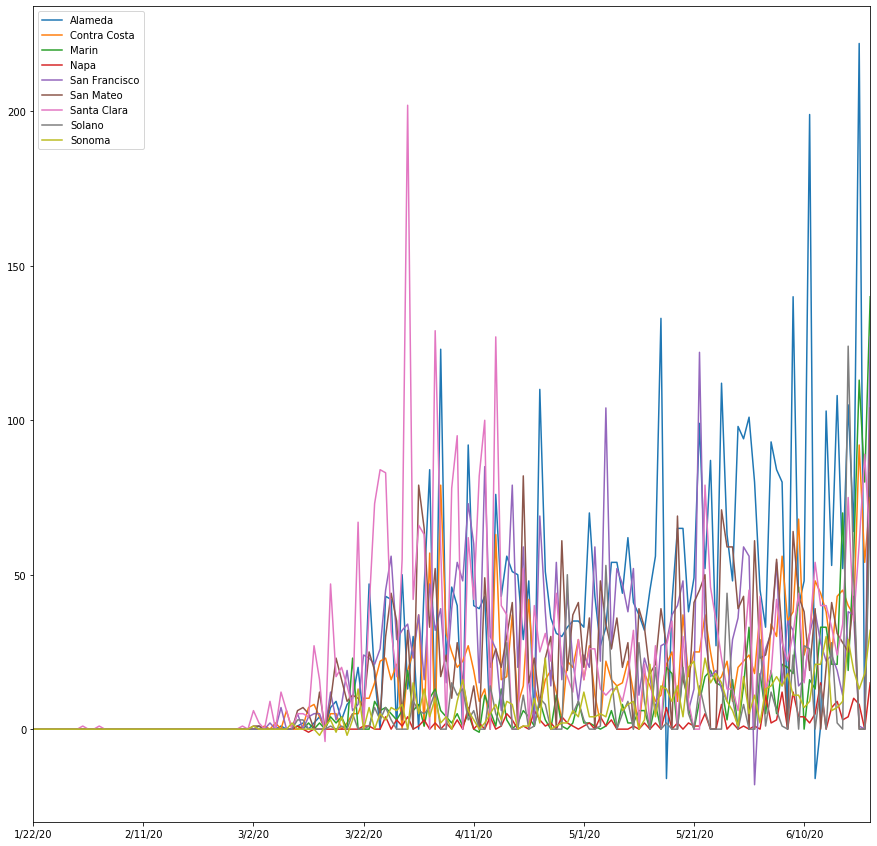

In [113]:
BA_transpose.plot(figsize=(15,15));

In [ ]:
US_confirmed_daily_increase.head()

In [ ]:
US_dead_daily_increase.head()

In [ ]:
df_usconf.loc[df_usconf['Country_Region']=='US']

In [ ]:
#total confirmed cases in the US todate
total_confirmed_US = df_usconf.iloc[:,-1:].sum()
total_confirmed_US

In [ ]:
df_usconf[(df_usconf['Province_State'] == 'California') & (df_usconf['2/1/20'] != 0)]

In [ ]:
state_total_confirmed = df_usconf.groupby(['Country_Region','Province_State']).sum().iloc[:,-1].sort_values(ascending = False)
state_total_confirmed.head()

In [ ]:
#percentage of total US confirmed cases by state
state_total_confirmed.groupby(level = 0).apply(lambda x: 100*x / float(x.sum())).head()

In [ ]:
#total confirmed cases in California
total_confirmed_CA = df_usconf[df_usconf['Province_State'] == 'California'].iloc[:,-1:].sum()
total_confirmed_CA

In [ ]:
#daily reports dataframe
url = 'https://raw.githubusercontent.com/AndrewDataScience/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/06-15-2020.csv'
df_0615 = pd.read_csv(url,error_bad_lines = False)
pd.options.display.max_columns = None
df_0615.head(15)

# APENDIX

In [ ]:
#experimentation for speeding up copy paste
#fastest was using .diff across the entire dataframe, obviously. No slicing required

%%timeit -r 15

test = US_confirmed_daily_increase.copy()[1:3]

test.iloc[:,6:] = test.iloc[:,6:].diff(axis = 1)
#44.5 ms per loop

%%timeit -r 15

test = US_confirmed_daily_increase.copy()[1:3]

for index in range(0,len(test)): 
    update = test.values[index,6:] - test.iloc[index,6:].shift(1, fill_value=0).values
    test.iloc[index,6:] = update
#64.4 ms per loop

%%timeit -r 15

test = US_confirmed_daily_increase.copy()[1:3]

for index in range(0,len(test)): 
    test.iloc[index,6:] = test.iloc[index,6:] - test.iloc[index,6:].shift(1, fill_value=0)
#64.8 ms per loop

%%timeit -r 15

test = US_confirmed_daily_increase.copy()[1:3]

for index in range(0,len(test)):
    test.iloc[index,6:] = test.iloc[index,6:].diff()
#66.1 ms per loop

%%timeit -r 15

test = US_confirmed_daily_increase.copy()[1:3]

for index in range(0,len(test)): 
    test.iloc[index,6:] = test.values[index,6:] - test.iloc[index,6:].shift(1, fill_value=0)
#66.3 ms per loop

%%timeit -r 15

test = US_confirmed_daily_increase.copy()[1:3]

for index in range(0,len(test)): 
    update = test.iloc[index,6:] - test.iloc[index,6:].shift(1, fill_value=0)
    test.iloc[index,6:] = update
#66.3 ms per loop

%%timeit -r 15

test = US_confirmed_daily_increase.copy()[1:3]

for index in range(0,len(test)): 
    update = test.values[index,6:] - test.iloc[index,6:].shift(1, fill_value=0)
    test.iloc[index,6:] = update
#68.8 ms per loop

%%timeit -r 15

test = US_confirmed_daily_increase.copy()[1:3]

shift = test.iloc[:,6:].shift(1, axis = 1, fill_value=0).values
for index in range(0,len(test)): 
    test.iloc[index,6:] = test.values[index,6:] - shift[index]
70.4 ms per loop

%%timeit -r 15

test = US_confirmed_daily_increase.copy()[1:3]

for index in range(0,len(test)):
    test.iloc[index,6:] = np.diff(test.values[index,6:], prepend=0)
#71.5 ms per loop

In [ ]:
for index in range(0,len(CA_daily_new_df.head())): 
    CA_daily_new_df.head().iloc[index,6:] = CA_daily_new_df.head().iloc[index,6:] - CA_daily_new_df.head().iloc[index,6:].shift(1, fill_value=0)

CA_daily_new_df.head().iloc[:,-15:].head()

In [ ]:
#do I need to calculate from the end of the df to the beginning?

for index in CA_daily_new_df.head().index: 
    for column in CA_daily_new_df.head().iloc[:,6:].columns[::-1].tolist():
        CA_daily_new_df.head().at(index,column)

In [ ]:
CA_daily_new_df = df_usconf[df_usconf['Province_State'] == 'California'].copy()
CA_daily_new_df.head()